# PIK 87/1

* [Verteilung der Funde](#Verteilung-der-Funde)
* [Keramische Stilgruppen](#Keramische-Stilgruppen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import re

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [110]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Fabric,
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Anzahl,Gewicht,Gr_Clist,Fabric,Art,Tiefe
0,PIK,87/1,1,PKM,1.0,29.0,70,1b,K,0.0
1,PIK,87/1,4,PKM,1.0,8.0,70,1d,K,0.0
2,PIK,87/1,5,PKM,1.0,18.0,70,1b,K,0.0
3,PIK,87/1,6,PKM,1.0,16.0,70,1b,K,0.0
4,PIK,87/1,7,MDB,1.0,13.0,70,3b,K,0.0


In [111]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
df_pivot.rename(columns={'HL': 'Hüttenlehm', 'K': 'Keramik'}, inplace=True)
# python2: df_pivot.rename(columns={'HL': 'Hüttenlehm'.decode('utf-8'), 'K': 'Keramik'}, inplace=True)
# df_pivot['HL'] = df_pivot['HL'].replace(['HL'], ['Keramik'])
df_pivot

Art,Eisen,Hüttenlehm,Keramik,Knochen,Ofenwand,Schlacke,Sonder,Stein,Tuyere
Tiefe,,,,,,,,,
0.0,0.0,0.0,193.0,0.0,0.0,5.0,0.0,0.0,0.0
32.0,0.0,12.0,4657.0,22.0,13.0,1234.0,0.0,192.0,12.0
52.0,27.0,4.0,6303.0,0.0,8.0,1435.0,0.0,266.0,0.0
72.0,0.0,0.0,4268.0,0.0,7.0,1341.0,0.0,29.0,0.0
92.0,0.0,42.0,2094.0,0.0,0.0,584.0,0.0,0.0,0.0
112.0,0.0,0.0,350.0,0.0,0.0,0.0,4.0,0.0,0.0
132.0,0.0,0.0,333.0,0.0,0.0,0.0,0.0,0.0,0.0
152.0,20.0,0.0,394.0,0.0,0.0,15.0,0.0,2.0,0.0
172.0,0.0,0.0,956.0,42.0,0.0,262.0,0.0,5.0,0.0


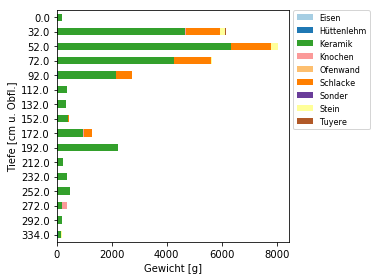

In [112]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.legend(loc = 4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})
plt.tight_layout()
plt.savefig('../output/figs/9-8_PIK87-1_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **PIK 87/1** Fundverteilung

In [113]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
# df_perc

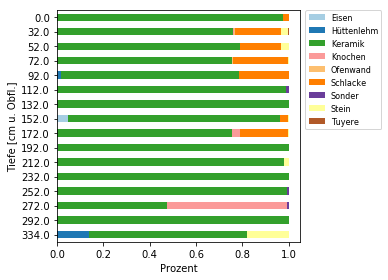

In [114]:
ax = df_perc.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Prozent')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.legend(loc = 4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + 1) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})
plt.tight_layout()
plt.savefig('../output/figs/9-8_PIK87-1_VerteilungFunde_perc.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [115]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-08_PIK87-1_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,Eisen,3,0.4,0.06,0.2
1,gebrannter Lehm,9,1.3,0.09,0.3
2,Keramik,462,67.3,23.28,79.9
3,Knochen,9,1.3,0.25,0.9
4,Ofenwand,4,0.6,0.03,0.1
5,Schlacke,162,23.6,4.88,16.7
6,Sonder,3,0.4,0.01,0.0
7,Stein,32,4.7,0.53,1.8
8,Tuyere,2,0.3,0.01,0.0


## Fabrics

In [116]:
# Bereinigen um nur die Gruppen zu haben:
# alles hinter der zweiten Stelle weg
df['FabricsGr'] = df['Fabric'].str[:2]
# nur Zahlen
df['FabricsGr2'] = df['FabricsGr'].str.extract('(\d)')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [117]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'FabricsGr2', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
df_pivot.rename(columns={'HL': 'Hüttenlehm', 'K': 'Keramik'}, inplace=True)
# python2: df_pivot.rename(columns={'HL': 'Hüttenlehm'.decode('utf-8'), 'K': 'Keramik'}, inplace=True)
# df_pivot['HL'] = df_pivot['HL'].replace(['HL'], ['Keramik'])
# df_pivot

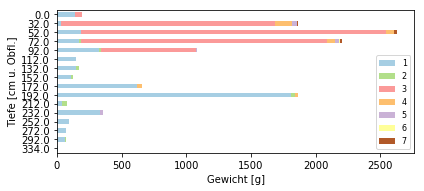

In [118]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.legend(loc = 4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((0.4*(abs(xlim[0]) + abs(xlim[1]))) / (abs(ylim[0]) + abs(ylim[1])))
#plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
#lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})
lgd = plt.legend(prop={'size':8})
plt.tight_layout()
plt.savefig('../output/figs/9-8_PIK87-1_Fabrics.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Keramische Stilgruppen

In [104]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Typ) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
df['Typ'] = df['Typ'].replace('','(?)')

df['Typ1'] = df['Typ']
df['Typ1'] = df['Typ1'].map(lambda x: x.rstrip(' (?)'))
df['Typ1'] = df['Typ1'].apply(lambda x: x.split('/')[0])\

display(df.head())

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe,Typ1
0,PIK,87/1,1,PKM,29,70,K,0.0,PKM
1,PIK,87/1,4,PKM,8,70,K,0.0,PKM
2,PIK,87/1,5,PKM,18,70,K,0.0,PKM
3,PIK,87/1,6,PKM,16,70,K,0.0,PKM
4,PIK,87/1,7,MDB,13,70,K,0.0,MDB


In [105]:
np.sum(df['Gewicht'])

19997

In [106]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ1', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
df_pivot

Typ1,EBA,KON,LUS,MAT,MBJ,MDB,NGB,PDM,PKM
Tiefe,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,141.0
32.0,0.0,2.0,0.0,0.0,0.0,3916.0,0.0,6.0,74.0
52.0,59.0,3.0,0.0,4.0,0.0,5136.0,0.0,0.0,126.0
72.0,0.0,0.0,0.0,6.0,0.0,3083.0,0.0,14.0,184.0
92.0,0.0,0.0,0.0,0.0,2.0,1237.0,0.0,0.0,401.0
112.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,145.0
132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0
152.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,294.0
172.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,0.0,832.0


> ToDo: evtl. Chronologieschema zur Abfolge der Stilgruppen in die DB ablegen
> * siehe:
    > * custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
    > * df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))


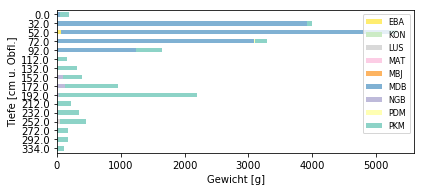

In [109]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Set3_r')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((0.4*(abs(xlim[0]) + abs(xlim[1]))) / (abs(ylim[0]) + abs(ylim[1])))
#plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
#lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})
lgd = plt.legend(prop={'size':8})
plt.tight_layout()
plt.savefig('../output/figs/9-8_PIK87-1_KeramikStilgruppen.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### > **PIK 87/1** keramische Stilgruppen

In [77]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot.divide(df_pivot.sum(axis=1)/100, axis=0)
# df_perc

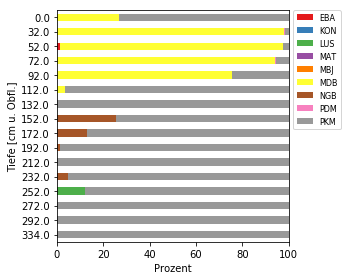

In [78]:
ax = df_perc.plot(kind = 'barh', stacked=True, cmap = 'Set1')
plt.xlabel('Prozent')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.legend(loc = 4)
plt.xlim(0,100)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + 100) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})
plt.tight_layout()
plt.savefig('../output/figs/9-8_PIK87-1_KeramikStilgruppen_B.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [79]:
df_l = df_pivot.unstack()
df_l = pd.DataFrame(df_l)
df_l = df_l.reset_index()
display(df_l.head())

,Typ1,Tiefe,0
0,EBA,0.0,0.0
1,EBA,32.0,0.0
2,EBA,52.0,59.0
3,EBA,72.0,0.0
4,EBA,92.0,0.0


In [80]:
df_pivot.to_csv("../data/processed/9-08_PIK87-1_SeriationPivot_transf.csv")
df_l.to_csv("../data/processed/9-08_PIK87-1_SeriationList_transf.csv")

In [81]:
#df_l.plot(kind = 'barh', by = df['Typ'])
# plt.barh(df, by = df['Typ'])
# by = df['Typ']

#cols = len(pd.unique(df_l['Typ']))
#fig, axes = plt.subplots(1, cols, figsize=(8, 8))
#for i, c in enumerate(df_l.columns):
#    df_l[c].plot(kind='bar', ax=axes[i], figsize=(12, 10), title=c)

### Korrelation Stilgruppe / Scherben -- PKM vs MDB

In [82]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Fabric, 
           t_Obj.Typ 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Typ) != '')
           AND ((t_Obj.Fabric) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Typ1'] = df['Typ']
df['Typ1'] = df['Typ1'].map(lambda x: x.rstrip(' (?)'))
df['Typ1'] = df['Typ1'].apply(lambda x: x.split('/')[0])\

df['Fabric1'] = df['Fabric']
df['Fabric1'] = df['Fabric1'].map(lambda x: x.rstrip(' (?)'))
df['Fabric1'] = df['Fabric1'].apply(lambda x: x.split('/')[0])
len(df)

400

In [83]:
PKM = df.loc[df['Typ1'].str.contains("PKM")]
MDB = df.loc[df['Typ1'].str.contains("MDB")]
df2 = pd.concat([PKM, MDB])
len(df2)

386

In [84]:
# Fabrics-Klassen:
df2.loc[df2['Fabric1'].str.contains("1|2"), 'Scherben'] = '1er'
df2.loc[df2['Fabric1'].str.contains("3"), 'Scherben'] = '3er'
df2.loc[~df2['Fabric1'].str.contains("1|2|3"), 'Scherben'] = 'Sonst.'

In [85]:
df2.head()

,objID,Fabric,Typ,Typ1,Fabric1,Scherben
0,475,1b,PKM,PKM,1b,1er
1,476,1d,PKM,PKM,1d,1er
2,477,1b,PKM,PKM,1b,1er
3,478,1b,PKM,PKM,1b,1er
5,480,1e,PKM,PKM,1e,1er


In [86]:
df_pivot = df2.pivot_table(values = 'objID', index = 'Scherben', columns = 'Typ1', aggfunc = len, margins = True, fill_value=0)
df_pivot = df_pivot.reset_index()
df_pivot

Typ1,Scherben,MDB,PKM,All
0,1er,0.0,157.0,157.0
1,3er,209.0,2.0,211.0
2,Sonst.,15.0,3.0,18.0
3,All,224.0,162.0,386.0


In [87]:
print(df_pivot.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
Scherben &    MDB &    PKM &    All \\
\midrule
     1er &    0.0 &  157.0 &  157.0 \\
     3er &  209.0 &    2.0 &  211.0 \\
  Sonst. &   15.0 &    3.0 &   18.0 \\
     All &  224.0 &  162.0 &  386.0 \\
\bottomrule
\end{tabular}




## 1987 ausgesonderte Keramik

In [131]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe,
           t_Obj.Notiz
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Anzahl) != 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
df['Typ'] = df['Typ'].replace('','(?)')
display(df.head())

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Anzahl,Gewicht,Gr_Clist,Art,Tiefe,Notiz
0,PIK,87/1,,MDB (?),,190,,K,32,T 29; 1987 im Gelände ausgesondert
1,PIK,87/1,,PKM (?),,210,,K,252,T 245+; 1987 im Gelände ausgesondert
2,PIK,87/1,-1,MDB (?),,1970,,K,32,1987 im Gelände ausgesondert
3,PIK,87/1,-1,None,,560,,K,32,"1987 im Gelände ausgesondert ""glatt"""
4,PIK,87/1,-2,MDB (?),,2710,,K,52,1987 im Gelände ausgesondert


In [132]:
a = np.sum(df['Gewicht'])
a

11300

In [133]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', aggfunc = sum)
# df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
df_pivot

,Gewicht
Tiefe,
32,2720
52,3550
72,1960
92,990
112,200
132,160
152,270
172,300
192,330


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

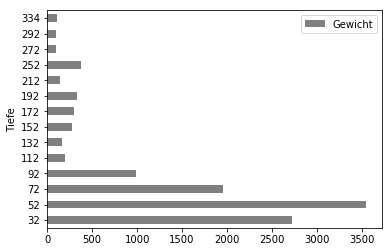

In [134]:
#fig = plt.figure(1)
#fig.set_size_inches(12, 5.5)

ax = df_pivot.plot(kind = 'barh', color = 'gray')
# df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((0.4*(abs(xlim[0]) + abs(xlim[1]))) / (abs(ylim[0]) + abs(ylim[1])))
#plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.savefig('../output/figs/9-8_PIK87-1-1987ausgesondert_A.pdf', bbox_inches='tight')
plt.show()

> **PIK 87/1** 1987 ausgesonderte Keramik

In [92]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum)

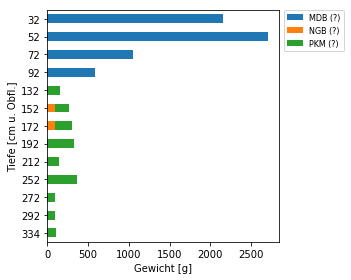

In [93]:
ax = df_pivot.plot(kind = 'barh', stacked = True)
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})
plt.tight_layout()
plt.savefig('../output/figs/9-8_PIK87-1-1987ausgesondert_B.pdf', bbox_inches='tight')
plt.show()

In [117]:
# Gewicht aller Keramik
sql = """SELECT
           t_Obj.Gewicht
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)



c = pd.Series({'aufgehoben':np.sum(df['Gewicht']),
               'ausgesondert':a})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
aufgehoben,23279,67.321207
ausgesondert,11300,32.678793


## Zusammensetzungen zwischen den Abträgen (nur PIK/MUN-Gr)

In [118]:
sql = """SELECT
           t_Obj.ObjID,
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'PIK')
           AND ((t_Komplex.bef_nr) = '87/1')
           AND ((t_obj.Individuum) Like '% %'))""".replace('\n',' ')

#            AND ((t_obj.Individuum) Like '%,%')

df = pd.read_sql(sql, con)
display(df)

,objID,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,486,PIK,87/1,-1:101 -2:67,MDB,76,70,K,52
1,516,PIK,87/1,-10:7 -11:1 /I-11:4 /I-12:2,PKM,174,120,K,232
2,544,PIK,87/1,-2:114 -7:8,PKM,43,120,K,52
3,564,PIK,87/1,-2:3 -3:7,MDB,494,200,K,72
4,570,PIK,87/1,-1:72 -2:5,MDB,328,200,K,52
5,584,PIK,87/1,-2:119 -3:5 -4:6,MDB,146,120,K,92
6,619,PIK,87/1,-4:50 -5:12,PKM,20,70,K,112
7,639,PIK,87/1,-5:1 -6:10 -7:12 - 9:6,PKM,100,120,K,192
8,655,PIK,87/1,-7:1 -8:4,PKM,462,200,K,172
9,657,PIK,87/1,-6:4 -7:10,PKM,10,70,K,152


In [119]:
# manuell erstelle CSV-Datei einlesen
df = pd.read_csv('../data/base/PIK87-1_Keramik_Zusammensetzungen.csv')
# display(df.head())

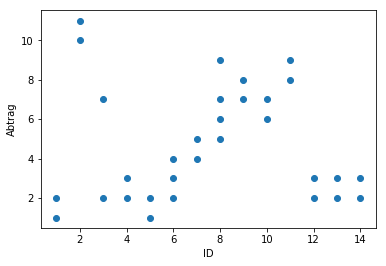

In [120]:
x = df['ID']
y = df['Abtrag']
plt.scatter(x, y)
plt.xlabel("ID")
plt.ylabel("Abtrag")

## Fragmentierung

In [121]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Gr_Clist, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_obj.Gr_Clist) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Gr_Clist,Art
0,PIK,87/1,1,70,K
1,PIK,87/1,4,70,K
2,PIK,87/1,5,70,K
3,PIK,87/1,6,70,K
4,PIK,87/1,7,70,K


In [122]:
df_pivot = df.pivot_table(values = 'ort_kurz', index = 'Gr_Clist', aggfunc = len)
# da es in PIK 87/1 keine Keramik größer als 20 gab, müssen Dummy-Werte manuell eingefügt werden:
df_pivot['>200'] = 0.
df_pivot

Gr_Clist
30      235.0
70      197.0
120      24.0
200       6.0
>200      0.0
Name: ort_kurz, dtype: float64

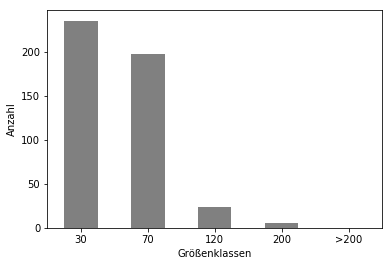

In [123]:
df_pivot.plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.savefig('../output/figs/9-8_PIK87-1_Fragmentierung.pdf', bbox_inches='tight')
plt.show()

> **PIK 87/1** Fragmentierung

getrennt nach den beiden Gruben:

In [126]:
# MDB-Keramik in Grube A
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Gr_Clist, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_obj.Gr_Clist) != '')
           AND ((t_Obj.Typ) Like '%MDB%'))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)
df_pivot1 = df1.pivot_table(values = 'ort_kurz', index = 'Gr_Clist', aggfunc = len)
df_pivot1['>200'] = 0.

# PIK/MUN-Keramik in Grube B1/B2
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Gr_Clist, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_obj.Gr_Clist) != '')
           AND ((t_Obj.Typ) Like '%PIK%'))""".replace('\n',' ')

df2 = pd.read_sql(sql, con)
df_pivot2 = df2.pivot_table(values = 'ort_kurz', index = 'Gr_Clist', aggfunc = len)
df_pivot2['>200'] = 0.

#display(df.head())

In [127]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)
df_pivot1.plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.title('Grube A\nMandombe-Keramik')

plt.subplot(122)
df_pivot2.plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.title('Grube B1/B2\nPikunda-Munda-Keramik')

plt.savefig('../output/figs/9-8_PIK87-1_Fragmentierung_B.pdf', bbox_inches='tight')
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

> **PIK 87/1**

## Schlacken

In [ ]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Tiefe,
           t_Obj.Schlacke_Typ,
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) Like '%Schlacke%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

n

In [ ]:
np.sum(df['Anzahl'])

Schlacken-Gewicht:

In [ ]:
np.sum(df['Gewicht'])

In [ ]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Schlacke_Typ', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
df_pivot

In [ ]:
df_pivot2 = df.pivot_table(values = 'Gewicht', index = 'Schlacke_Typ', aggfunc = sum)
df_pivot2

In [ ]:
df_pivot3 = df.pivot_table(values = 'Gewicht', index = 'Gr_Clist', aggfunc = sum)
df_pivot3

In [ ]:
# Dummyliste mit allen Tiefen, in denen keine Schlacken ge
df_blank = pd.DataFrame([[112, 0], [132, 0], [192, 0], [212, 0], [232, 0], [252, 0], [272, 0], [292, 0], [334, 0]], columns=list('15'))
df_blank = df_blank.set_index(['1'])
# anhängen an df_pivot
df_pivot = df_pivot.append(df_blank)
# Index sortieren
df_pivot.sort_index(inplace=True)
df_pivot = df_pivot.fillna(0)

In [ ]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Set1')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})
plt.savefig('../output/figs/9-8_PIK87-1_Schlacken_A.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot2.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('Typen')
plt.savefig('../output/figs/9-8_PIK87-1_Schlacken_B.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot3.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('Größen')
plt.savefig('../output/figs/9-8_PIK87-1_Schlacken_C.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(1)
fig.set_size_inches(10,10)

plt.subplot(221)

df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
# plt.gca().invert_yaxis()
#plt.legend(loc = 4)

plt.subplot(222)

df_pivot2.plot(kind='pie', autopct='%.0f %%' )
plt.ylabel('')

plt.subplot(223)

df_pivot3.plot(kind='pie', autopct='%.0f %%' )
plt.ylabel('')

# plt.savefig('output/9.8 PIK 87-1 – Keramik Stilgruppen.pdf')
plt.show()